In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/Users/keertan.patro/Desktop/Practice/Yt_sentiment_analysis/Data/Clean/test_clean.csv")
text=df.iloc[424]['clean_comment']
text

' 火箭o辛基 这种帖子就好比，中国gdp增长从7 降为5 ，还是在高速增长，只是没这么变态罢了，中国低端制造业难过，只不过是中国的产业在逐渐转型而已，瞧把阿三激动的，多了点密集的制造业，乐的跟吃了蜜蜂屎一样。。。\n'

In [4]:
import re
def non_ascii_matches(text):
    non_ascii_pattern="[^A-Za-z0-9\s!?.,]"
    if pd.isna(text):
        return False
    non_ascii_matches=re.findall(non_ascii_pattern,text)
    if non_ascii_matches:
        return True
    else:
        return False
df[df['clean_comment'].apply(non_ascii_matches)]

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/hj/pb36nbg93kz0c0dn51ck371w0000gq/T/ipykernel_93724/2741804648.py:3: SyntaxWarning: invalid escape sequence '\s'
  non_ascii_pattern="[^A-Za-z0-9\s!?.,]"


,clean_comment,category,new_clean_comment,processed_text
2,happy have you what’ one great thing that’ ha...,1,happy have you what one great thing that happe...,happy one great thing happened recently
23,was museum today which described this “religi...,2,was museum today which described this religion...,museum today described religion set discrete r...
31,there are people who trust pakistan which has...,1,there are people who trust pakistan which has ...,people trust pakistan denied existence terrori...
43,unless she gets complete congress vote jds wil...,1,unless she gets complete congress vote jds wil...,unless get complete congress vote jds win easi...
76,great effort hard believe odin doesn’ know abo...,1,great effort hard believe odin doesn know abou...,great effort hard believe odin know kratos rav...
...,...,...,...,...
6791,meanwhile pakistan jpg “khan tea stall tea go...,1,meanwhile pakistan jpg khan tea stall tea good...,meanwhile pakistan jpg khan tea stall tea good...
6798,ppr team witten @ nyg\nmcdonald @ still avail...,1,ppr team witten nyg mcdonald still available...,ppr team witten nyg mcdonald still available w...
6803,ppr walford @ saints zach miller @ texans,0,ppr walford saints zach miller texans,ppr walford saint zach miller texan
6821,hahaha top tier bakchodi from modi \ \,1,hahaha top tier bakchodi from modi,hahaha top tier bakchodi modi


In [5]:
text=df.iloc[424]['clean_comment']
non_ascii_matches(text)

True

In [6]:
import re
def pre_process(text):
  url_pattern="https?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F\][0-9a-fA-F]))+"
  non_ascii_pattern="[^\x00-\x7F]+"
  url_matches=re.findall(url_pattern,text)
  non_ascii_matches=re.findall(non_ascii_pattern,text)
  if non_ascii_matches:
    return 
  text=text.lower()
  text=text.replace("\n"," ")
  text=text.strip()
  if url_matches:
    for url in url_matches:
      text=text.replace(url,"")
  if non_ascii_matches:
    for non_ascii in non_ascii_matches:
      text=text.replace(non_ascii,"")
  text=text.strip()
  if len(text.split())<=2:
    return np.nan
  return text

<>:3: SyntaxWarning: invalid escape sequence '\]'
<>:3: SyntaxWarning: invalid escape sequence '\]'
/var/folders/hj/pb36nbg93kz0c0dn51ck371w0000gq/T/ipykernel_93724/10035072.py:3: SyntaxWarning: invalid escape sequence '\]'
  url_pattern="https?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F\][0-9a-fA-F]))+"


In [7]:
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
lemm=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/keertan.patro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/keertan.patro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df=pd.read_csv("https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv")
df.dropna(inplace=True)

In [9]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [10]:
stopwords=[word for word in stopwords.words('english') if word not in ('not','but','however','no','yet')]

In [11]:
def remove_stopwords(text):
  new_text=""
  for word in text.split():
    if word not in stopwords:
      word=lemm.lemmatize(word)
      new_text+=word+" "
  return new_text.strip()

In [12]:
df['new_clean_comment']=df['clean_comment'].apply(pre_process)
df.dropna(inplace=True)
df['processed_comment']=df['new_clean_comment'].apply(remove_stopwords)

In [13]:
def get_max_length(df):
  max_length=-float('inf')
  top_index=0
  for index, text in enumerate(df['processed_comment']):
    text_len=len(text.split())
    if text_len>max_length:
      max_length=text_len
      top_index=index
  return max_length,top_index
max_length,top_index=get_max_length(df)

In [14]:
max_length,top_index

(893, 21036)

In [15]:
df['new_category']=df['category'].apply(lambda x: x if x in (1,0) else 2 )

In [16]:
df['new_category'].value_counts()

new_category
1    14560
0    10522
2     7646
Name: count, dtype: int64

In [17]:
import tensorflow as tf

In [18]:
max_length=600

In [19]:
import os
def get_root_directory():
   try:
      path=os.path.dirname(os.path.abspath(__file__))
      prev_path=os.path.abspath(os.path.join(path,"../../"))
      return prev_path
   except Exception as e:
      raise
dir_path=get_root_directory()
train_data_path=dir_path+"/Data/Clean/train_clean.csv"
test_data_path=dir_path+"/Data/Clean/test_clean.csv"
model_path=dir_path+"/lstm_model.pth"

NameError: name '__file__' is not defined

In [20]:
import json
json.dump({'a':21},open("test.json",'w'))
json.load(open("test.json",'r'))

{'a': 21}

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import dataset,DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

In [23]:
tokenizer=Tokenizer(num_words=2000,lower=True)
tokenizer.fit_on_texts(df['processed_comment'])

In [24]:
text=df.iloc[5]['processed_comment']

In [25]:
val=tokenizer.texts_to_sequences([text])
val

[[1529, 481, 339, 1556, 851, 1204, 1337, 1556, 280, 845, 1701]]

In [26]:
vocab=tokenizer.word_index
len(vocab)
max_len=900
X=tokenizer.texts_to_sequences(df['processed_comment'])
X=pad_sequences(X,maxlen=max_len)
y=np.array(df['new_category'])

In [27]:
X.shape

(32728, 900)

In [28]:
len(X[21036])

900

In [29]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [30]:
device

'cpu'

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)
X_train=torch.tensor(X_train,dtype=torch.long).to(device)
X_test=torch.tensor(X_test,dtype=torch.long).to(device)
y_train=torch.tensor(y_train,dtype=torch.long).to(device)
y_test=torch.tensor(y_test,dtype=torch.long).to(device)
train_dataset=TensorDataset(X_train,y_train)
test_dataset=TensorDataset(X_test,y_test)

In [32]:
batch_size=4
output_dim=3
train_dataloader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_dataloader=DataLoader(test_dataset,batch_size=batch_size,shuffle=True)

In [33]:
class Lstm_model(nn.Module):
  def __init__(self,vocab_size,embedding_dim,hidden_dim):
    super().__init__()
    self.embedding=nn.Embedding(vocab_size,embedding_dim)
    self.lstm=nn.LSTM(embedding_dim,hidden_dim,batch_first=True)
    self.linear=nn.Linear(hidden_dim,output_dim)

  def forward(self,x):
    x=self.embedding(x)
    output,hidden=self.lstm(x)
    x=hidden[-1]
    y=self.linear(x)
    return y

In [34]:
print(torch.version.cuda)

None


[[]]

In [41]:
len(vocab)

40048

In [47]:
configs=json.load(open('/Users/keertan.patro/Desktop/Practice/Yt_sentiment_analysis/model_config.json','r'))
configs

{'model_path': '/Users/keertan.patro/Desktop/Practice/Yt_sentiment_analysis/lstm_model.pth',
 'vocab_size': 46578,
 'embedding_dim': 128,
 'hidden_dim': 64}

In [50]:
vocab_size=configs['vocab_size']
embedding_dim=configs['embedding_dim']
hidden_dim=configs['hidden_dim']

In [51]:
model=Lstm_model(vocab_size,embedding_dim,hidden_dim).to(device)
model.load_state_dict(torch.load('/Users/keertan.patro/Desktop/Practice/Yt_sentiment_analysis/lstm_model.pth'))
model

Lstm_model(
  (embedding): Embedding(46578, 128)
  (lstm): LSTM(128, 64, batch_first=True)
  (linear): Linear(in_features=64, out_features=3, bias=True)
)

In [76]:
text=["How are you doing?","Hey whats going on"]
vec=tokenizer.texts_to_sequences(text)
vec=pad_sequences(vec,900)
vec.shape

(2, 900)

In [77]:
vec=torch.tensor(vec,dtype=torch.long)

In [92]:
y_pred=model(vec)

In [93]:
y_pred

tensor([[[ 2.0215, -1.1130, -1.3499],
         [ 1.6775, -0.4069, -0.8163]]], grad_fn=<ViewBackward0>)

In [94]:
torch.argmax(y_pred,dim=-1).shape
y=torch.max(y_pred,-1).indices.view(2)
y

tensor([0, 0])

[0, 0]

In [75]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.0001)

In [35]:
torch.save(model.state_dict(),'test_model.pth')
model=torch.load('test_model.pth')

In [38]:
model=torch.load('test_model.pth',weights_only=True)
model

OrderedDict([('embedding.weight',
              tensor([[ 0.5657, -0.2033,  0.9762,  ...,  1.3672, -0.0592, -0.1217],
                      [ 0.8330, -0.8660, -0.7411,  ...,  0.1279,  0.5706, -0.2426],
                      [ 2.2252,  0.8623,  0.3364,  ...,  1.5675, -1.4890,  1.1445],
                      ...,
                      [-1.0010,  0.4126, -0.1223,  ..., -1.9169, -0.8434,  0.7872],
                      [ 0.2524, -1.2508, -0.4507,  ..., -1.0283,  1.5766,  1.5063],
                      [-0.7897,  0.3919, -0.3935,  ..., -1.2055,  1.9897, -0.1641]])),
             ('lstm.weight_ih_l0',
              tensor([[-0.0047, -0.0073,  0.0805,  ...,  0.0380, -0.0222,  0.0523],
                      [ 0.0740, -0.0387,  0.0984,  ..., -0.1107,  0.0856, -0.0548],
                      [ 0.0318,  0.0696, -0.0917,  ..., -0.0095, -0.0438, -0.1196],
                      ...,
                      [ 0.0208,  0.0491,  0.0593,  ...,  0.0476, -0.1202,  0.0463],
                      [-0.1019,  0

In [40]:
lm_model=Lstm_model(len(vocab),128,64).to(device)
lm_model.load_state_dict(model)

<All keys matched successfully>

In [46]:
lm_model.state_dict()

OrderedDict([('embedding.weight',
              tensor([[ 0.5657, -0.2033,  0.9762,  ...,  1.3672, -0.0592, -0.1217],
                      [ 0.8330, -0.8660, -0.7411,  ...,  0.1279,  0.5706, -0.2426],
                      [ 2.2252,  0.8623,  0.3364,  ...,  1.5675, -1.4890,  1.1445],
                      ...,
                      [-1.0010,  0.4126, -0.1223,  ..., -1.9169, -0.8434,  0.7872],
                      [ 0.2524, -1.2508, -0.4507,  ..., -1.0283,  1.5766,  1.5063],
                      [-0.7897,  0.3919, -0.3935,  ..., -1.2055,  1.9897, -0.1641]])),
             ('lstm.weight_ih_l0',
              tensor([[-0.0047, -0.0073,  0.0805,  ...,  0.0380, -0.0222,  0.0523],
                      [ 0.0740, -0.0387,  0.0984,  ..., -0.1107,  0.0856, -0.0548],
                      [ 0.0318,  0.0696, -0.0917,  ..., -0.0095, -0.0438, -0.1196],
                      ...,
                      [ 0.0208,  0.0491,  0.0593,  ...,  0.0476, -0.1202,  0.0463],
                      [-0.1019,  0

In [32]:
from tqdm import tqdm

In [47]:
import json
model_dict={"key1":12}
json.load(model_dict,open("test.json","w"))

TypeError: load() takes 1 positional argument but 2 were given

In [33]:
model.train()
for epoch in range(25):
  total_loss=0
  for x,y in tqdm(train_dataloader):
    y_pred=model(x)
    y_pred=y_pred.squeeze()
    batch_size=y.shape[0]
    y_pred=y_pred.view(batch_size,output_dim)
    loss=criterion(y_pred,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_loss+=loss.item()
  print(f"Loss for epoch-{epoch} is", total_loss)

  8%|▊         | 533/6546 [01:00<11:22,  8.81it/s]


KeyboardInterrupt: 

In [34]:
model_path="/Users/keertan.patro/Desktop/Practice/Yt_sentiment_analysis/lstm_model.pth"
torch.save(model,model_path)

In [48]:
model

OrderedDict([('embedding.weight',
              tensor([[ 0.5657, -0.2033,  0.9762,  ...,  1.3672, -0.0592, -0.1217],
                      [ 0.8330, -0.8660, -0.7411,  ...,  0.1279,  0.5706, -0.2426],
                      [ 2.2252,  0.8623,  0.3364,  ...,  1.5675, -1.4890,  1.1445],
                      ...,
                      [-1.0010,  0.4126, -0.1223,  ..., -1.9169, -0.8434,  0.7872],
                      [ 0.2524, -1.2508, -0.4507,  ..., -1.0283,  1.5766,  1.5063],
                      [-0.7897,  0.3919, -0.3935,  ..., -1.2055,  1.9897, -0.1641]])),
             ('lstm.weight_ih_l0',
              tensor([[-0.0047, -0.0073,  0.0805,  ...,  0.0380, -0.0222,  0.0523],
                      [ 0.0740, -0.0387,  0.0984,  ..., -0.1107,  0.0856, -0.0548],
                      [ 0.0318,  0.0696, -0.0917,  ..., -0.0095, -0.0438, -0.1196],
                      ...,
                      [ 0.0208,  0.0491,  0.0593,  ...,  0.0476, -0.1202,  0.0463],
                      [-0.1019,  0

In [36]:
from sklearn.metrics import classification_report
def evaluate_model(model,test_dataloader):
  model.eval()
  y_pred_all=[]
  y_true_all=[]
  for x,y in test_dataloader:
    y_pred=model(x)
    y_pred=torch.max(y_pred,-1).indices.view(y.shape[0])
    if y_pred.device.type=="cuda":
      y_pred=y_pred.to("cpu").tolist()
      y=y.to("cpu").tolist()
      y_pred_all.extend(y_pred)
      y_true_all.extend(y)
    elif y_pred.device.type=="cpu":
      y_pred=y_pred.tolist()
      y_pred_all.extend(y_pred)
      y=y.tolist()
      y_true_all.extend(y)
  report=classification_report(y_true_all,y_pred_all,output_dict=True)
  return report,y_true_all,y_pred_all

In [37]:
import mlflow
import json
mlflow.set_tracking_uri("http://ec2-52-23-156-179.compute-1.amazonaws.com:5000")
from mlflow.tracking import MlflowClient
client=MlflowClient()

experiment=client.get_experiment_by_name("Yt_analysis")
experiment_id=experiment.experiment_id
run = client.create_run(experiment_id=experiment_id)
run_id = run.info.run_id

class_report,y_true_all,y_pred_all=evaluate_model(model,test_dataloader)
print("class report:",class_report)
client.log_param(run_id,"Model","LSTM")
for metric in class_report:
    if type(class_report[metric])==dict:
        for key in class_report[metric]:
            if key!='support':
                client.log_metric(run_id,f"{metric}_{key}",class_report[metric][key])
    else:
        client.log_metric(run_id,metric,class_report[metric])
model_path=mlflow.pytorch.log_model(model, "sentiment_model")
model_path=model_path.model_uri
with open("model_details.json","w") as f:
    details={
        "run_id":run_id,
        "model_uri":model_path
    }
    f.write(json.dumps(details))

class report: {'0': {'precision': 0.5950834879406308, 'recall': 0.6095011876484561, 'f1-score': 0.6022060549166862, 'support': 2105.0}, '1': {'precision': 0.5347259902333152, 'recall': 0.6768543956043956, 'f1-score': 0.59745377387087, 'support': 2912.0}, '2': {'precision': 0.30113636363636365, 'recall': 0.13865271419228253, 'f1-score': 0.18987908643081056, 'support': 1529.0}, 'accuracy': 0.5294836541399328, 'macro avg': {'precision': 0.4769819472701033, 'recall': 0.4750027658150448, 'f1-score': 0.46317963840612225, 'support': 6546.0}, 'weighted avg': {'precision': 0.4995738352695451, 'recall': 0.5294836541399328, 'f1-score': 0.5037815854360383, 'support': 6546.0}}


2025/10/08 16:20:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/08 16:20:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [38]:
mlflow.pytorch.load_model(model_path)

/Users/keertan.patro/miniconda3/envs/mlflow/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Lstm_model(
  (embedding): Embedding(40048, 128)
  (lstm): LSTM(128, 64, batch_first=True)
  (linear): Linear(in_features=64, out_features=3, bias=True)
)

In [41]:
with open("model_details.json","w") as f:
    details={
        "run_id":run_id,
        "model_uri":model_path
    }
    f.write(json.dumps(details))

In [43]:
a=json.load(open("model_details.json","r"))
a

{'run_id': 'b07cd926f6bb43f5a06b8b7f8dec74b9',
 'model_uri': 'models:/m-0112233ec14c45ae91f83ee34eb21881'}

In [45]:
model_uri=a['model_uri']

In [46]:
mv=mlflow.register_model(model_uri=model_uri,name="sentiment_model")
client.transition_model_version_stage(
        name="sentiment_model",
        version=mv.version,
        stage="Production",
        archive_existing_versions=True
    )

Successfully registered model 'sentiment_model'.
2025/10/09 00:26:26 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sentiment_model, version 1
Created version '1' of model 'sentiment_model'.
/var/folders/hj/pb36nbg93kz0c0dn51ck371w0000gq/T/ipykernel_33670/2369929522.py:2: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


<ModelVersion: aliases=[], creation_timestamp=1759949786180, current_stage='Production', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1759949789728, metrics=None, model_id=None, name='sentiment_model', params=None, run_id='', run_link='', source='models:/m-0112233ec14c45ae91f83ee34eb21881', status='READY', status_message=None, tags={}, user_id='', version='1'>

In [ ]:
class_report,y_true_all,y_pred_all=evaluate_model(model,test_dataloader)
print("class report:",class_report)
client.log_param(run_id,"Model","LSTM")
for metric in class_report:
    if type(class_report[metric])==dict:
        for key in class_report[metric]:
            if key!='support':
                client.log_metric(run_id,f"{metric}_{key}",class_report[metric][key])
    else:
        client.log_metric(run_id,metric,class_report[metric])
model_path=mlflow.pytorch.log_model(model, "sentiment_model")
model_path=model_path.model_uri
with open("model_details.json","w") as f:
    details={
        "run_id":run_id,
        "model_uri":model_path
    }
    f.write(json.dumps(details))

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
def evaluate_model(model,test_dataloader):
  model.eval()
  y_pred_all=[]
  y_true_all=[]
  for x,y in test_dataloader:
    y_pred=model(x)
    y_pred=torch.max(y_pred,-1).indices.view(y.shape[0])
    if y_pred.device.type=="cuda":
      y_pred=y_pred.to("cpu").tolist()
      y=y.to("cpu").tolist()
      y_pred_all.extend(y_pred)
      y_true_all.extend(y)
    elif y_pred.device.type=="cpu":
      y_pred=y_pred.tolist()
      y_pred_all.extend(y_pred)
      y=y.tolist()
      y_true_all.extend(y)
  report=classification_report(y_true_all,y_pred_all,output_dict=True)
  return report,y_true_all,y_pred_all

In [36]:
evaluate_model(model,test_dataloader)

({'0': {'precision': 0.5500417014178482,
   'recall': 0.626603325415677,
   'f1-score': 0.5858316677770375,
   'support': 2105.0},
  '1': {'precision': 0.5299719887955182,
   'recall': 0.6497252747252747,
   'f1-score': 0.5837704412218451,
   'support': 2912.0},
  '2': {'precision': 0.31141868512110726,
   'recall': 0.11772400261608895,
   'f1-score': 0.170859041290935,
   'support': 1529.0},
  'accuracy': 0.5180262755881454,
  'macro avg': {'precision': 0.4638107917781579,
   'recall': 0.4646842009190135,
   'f1-score': 0.4468203834299392,
   'support': 6546.0},
  'weighted avg': {'precision': 0.48537662426020356,
   'recall': 0.5180262755881454,
   'f1-score': 0.48798635191605816,
   'support': 6546.0}},
 [2,
  1,
  1,
  1,
  1,
  2,
  1,
  0,
  2,
  0,
  1,
  1,
  0,
  0,
  0,
  2,
  2,
  0,
  0,
  2,
  0,
  1,
  0,
  1,
  2,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  2,
  1,
  2,
  1,
  1,
  2,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,

In [37]:
from sklearn.metrics import accuracy_score,recall_score,classification_report
import mlflow
import boto3
from dotenv import load_dotenv
import os
load_dotenv()
mlflow.set_tracking_uri("http://ec2-52-23-156-179.compute-1.amazonaws.com:5000")
# mlflow.set_experiment("Yt_analysis")

In [38]:
import mlflow.exceptions
from mlflow.tracking import MlflowClient
import requests

client=MlflowClient()
experiment=client.get_experiment_by_name("Yt_analysis")
experiment_id=experiment.experiment_id
try:
    prod_model=client.get_latest_versions("production_model",stages=['Production'])
except mlflow.exceptions.RestException:
    prod_model=None

/var/folders/hj/pb36nbg93kz0c0dn51ck371w0000gq/T/ipykernel_2014/484823568.py:9: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  prod_model=client.get_latest_versions("production_model",stages=['Production'])


In [39]:
prod_model

[<ModelVersion: aliases=[], creation_timestamp=1758975840910, current_stage='Production', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1758975848999, metrics=None, model_id=None, name='production_model', params=None, run_id='', run_link='', source='s3://yt-models-1/504809828903330705/208659ab9cef4fc4abcafb5661eaba66/artifacts', status='READY', status_message=None, tags={'model_path': 'models:/m-b25dc550dad8457ea26988622eb03a27'}, user_id='', version='2'>]

In [40]:
# model_uri="s3://yt-models-1/504809828903330705/models/m-46a02090a8c142dbbba46dc10e80edbb/artifacts"

In [41]:
# getting top models
runs = client.search_runs(
    experiment_ids=[experiment_id],
    order_by=['Created DESC']
)

In [42]:
a=runs[0]
a

<Run: data=<RunData: metrics={'0_f1-score': 0.6130746130746131,
 '0_precision': 0.5966726618705036,
 '0_recall': 0.6304038004750594,
 '1_f1-score': 0.6434385263458517,
 '1_precision': 0.5507210950867758,
 '1_recall': 0.773695054945055,
 '2_f1-score': 0.10454545454545454,
 '2_precision': 0.39826839826839827,
 '2_recall': 0.060170045781556575,
 'accuracy': 0.5609532538955087,
 'macro avg_f1-score': 0.4536861979886398,
 'macro avg_precision': 0.5152207184085592,
 'macro avg_recall': 0.4880896337338903,
 'weighted avg_f1-score': 0.5078009546656249,
 'weighted avg_precision': 0.5298882008986376,
 'weighted avg_recall': 0.5609532538955087}, params={'Model': 'LSTM'}, tags={'experiment_type': 'algorithmic comparison',
 'mlflow.runName': 'LSTM2',
 'mlflow.source.name': '/Users/keertan.patro/miniconda3/envs/mlflow/lib/python3.12/site-packages/ipykernel_launcher.py',
 'mlflow.source.type': 'LOCAL',
 'mlflow.user': 'keertan.patro'}>, info=<RunInfo: artifact_uri='s3://yt-models-1/504809828903330705

In [43]:
a.outputs.model_outputs[0].model_id
run_id=a.info.run_id
run_id

'208659ab9cef4fc4abcafb5661eaba66'

In [44]:
model_id=a.outputs.model_outputs[0].model_id
run_id=a.info.run_id
def load_latest_model(model_id):
    model_uri=f"models:/{model_id}"
    model=mlflow.pytorch.load_model(model_uri)
    return model
model=load_latest_model(model_id)
model

/Users/keertan.patro/miniconda3/envs/mlflow/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Lstm_model(
  (embedding): Embedding(40048, 128)
  (lstm): LSTM(128, 64, batch_first=True)
  (linear): Linear(in_features=64, out_features=3, bias=True)
)

In [45]:
def check_registered_model(stage):
    try:
        prod_model=client.get_latest_versions(name="production_model",stages=[stage])
    except mlflow.exceptions.RestException:
        prod_model=None
    return prod_model

In [46]:
prod_model=check_registered_model("Production")
prod_model

/var/folders/hj/pb36nbg93kz0c0dn51ck371w0000gq/T/ipykernel_2014/3881848128.py:3: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  prod_model=client.get_latest_versions(name="production_model",stages=[stage])


[<ModelVersion: aliases=[], creation_timestamp=1758975840910, current_stage='Production', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1758975848999, metrics=None, model_id=None, name='production_model', params=None, run_id='', run_link='', source='s3://yt-models-1/504809828903330705/208659ab9cef4fc4abcafb5661eaba66/artifacts', status='READY', status_message=None, tags={'model_path': 'models:/m-b25dc550dad8457ea26988622eb03a27'}, user_id='', version='2'>]

In [47]:
model_uri_new=f"runs:/{run_id}/LSTM2"

In [ ]:
def register_model(model_id,experiment_id):
    
    pass

In [58]:
mlflow.pytorch.load_model(a.info.artifact_uri)

MlflowException: The following failures occurred while downloading one or more artifacts from s3://yt-models-1/504809828903330705/208659ab9cef4fc4abcafb5661eaba66:
##### File artifacts #####
An error occurred (404) when calling the HeadObject operation: Not Found

In [ ]:
import os
os.path.abspath(__file__)
os.path.dirname(os.path.abspath(__file__))

NameError: name '__file__' is not defined

In [29]:
model_uri="models:/"+runs[0].outputs.model_outputs[0].model_id

In [5]:
root_dir = os.path.abspath(os.curdir)
root_dir

'/Users/keertan.patro/Desktop/Practice/Yt_sentiment_analysis/Notebooks'

In [39]:
model_uri

NameError: name 'model_uri' is not defined

In [35]:
mlflow.pytorch.load_model(model_uri)

Lstm_model(
  (embedding): Embedding(40048, 128)
  (lstm): LSTM(128, 64, batch_first=True)
  (linear): Linear(in_features=64, out_features=3, bias=True)
)

In [ ]:
mv=mlflow.register_model(model_uri=uri,name="production_model")
client.transition_model_version_stage(
    name="production_model",
    version=mv.version,
    stage="Production",
    model_id="",
    archive_existing_versions=True
)

Registered model 'production_model' already exists. Creating a new version of this model...
2025/09/09 00:51:29 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: production_model, version 2
Created version '2' of model 'production_model'.
/var/folders/hj/pb36nbg93kz0c0dn51ck371w0000gq/T/ipykernel_44033/3417786407.py:2: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


<ModelVersion: aliases=[], creation_timestamp=1757359288955, current_stage='Production', deployment_job_state=<ModelVersionDeploymentJobState: current_task_name='', job_id='', job_state='DEPLOYMENT_JOB_CONNECTION_STATE_UNSPECIFIED', run_id='', run_state='DEPLOYMENT_JOB_RUN_STATE_UNSPECIFIED'>, description='', last_updated_timestamp=1757359290589, metrics=None, model_id=None, name='production_model', params=None, run_id='', run_link='', source='s3://yt-models-1/504809828903330705/208659ab9cef4fc4abcafb5661eaba66/artifacts', status='READY', status_message=None, tags={}, user_id='', version='2'>

In [ ]:
# get_latest_model

#get_production_model

# if no production model -->  transition latest to production

# if production model --> evaluate performance with latest to prod model
        # latest better then latest to production
            # production to staging

        # else latest is bad
            # get staging model
                # -- staging found compare with staging if latest better replace staging and remove the previous  else archive latest
                # else push latest to staging




In [45]:
run_id=runs[0].info.run_id

In [46]:
mlflow.register_model(f"runs:/{run_id}",name="new_prod_model")

Successfully registered model 'new_prod_model'.


MlflowException: Unable to find a logged_model with artifact_path None under run 208659ab9cef4fc4abcafb5661eaba66

In [46]:
with mlflow.start_run():
    mlflow.set_tag("mlflow.runName","LSTM2")
    mlflow.set_tag("experiment_type","algorithmic comparison")
    class_report,y_true_all,y_pred_all=evaluate_model(model,test_dataloader)
    print("class report:",class_report)
    mlflow.log_param("Model","LSTM")
    for metric in class_report:
        if type(class_report[metric])==dict:
            for key in class_report[metric]:
                if key!="support":
                    mlflow.log_metric(f"{metric}_{key}",class_report[metric][key])
        else:
            mlflow.log_metric(metric,class_report[metric])
    mlflow.pytorch.log_model(model,"Lstm model")

class report: {'0': {'precision': 0.5966726618705036, 'recall': 0.6304038004750594, 'f1-score': 0.6130746130746131, 'support': 2105.0}, '1': {'precision': 0.5507210950867758, 'recall': 0.773695054945055, 'f1-score': 0.6434385263458517, 'support': 2912.0}, '2': {'precision': 0.39826839826839827, 'recall': 0.060170045781556575, 'f1-score': 0.10454545454545454, 'support': 1529.0}, 'accuracy': 0.5609532538955087, 'macro avg': {'precision': 0.5152207184085592, 'recall': 0.4880896337338903, 'f1-score': 0.4536861979886398, 'support': 6546.0}, 'weighted avg': {'precision': 0.5298882008986376, 'recall': 0.5609532538955087, 'f1-score': 0.5078009546656249, 'support': 6546.0}}


2025/09/07 22:50:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/07 22:51:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LSTM2 at: http://ec2-3-87-178-239.compute-1.amazonaws.com:5000/#/experiments/504809828903330705/runs/208659ab9cef4fc4abcafb5661eaba66
🧪 View experiment at: http://ec2-3-87-178-239.compute-1.amazonaws.com:5000/#/experiments/504809828903330705


In [43]:
mlflow.pytorch.log_model(model,"Lstm model")

2025/09/07 22:46:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/07 22:46:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [41]:
def store_best_model_lstm(model,test_dataloader):
  with mlflow.start_run():
    mlflow.set_tag("mlflow.runName", "LSTM")
    mlflow.set_tag("experiment_type", "algorithm_comparison")
    class_report,y_true_all,y_pred_all=evaluate_model(model,test_dataloader)
    print("class report:",class_report)
    for metric in class_report:
      mlflow.log_param("Model","LSTM")
      for metric in class_report:
        if type(class_report[metric])==dict:
          for key in class_report[metric]:
            if key!='support':
              mlflow.log_metric(f"{metric}_{key}",class_report[metric][key])
        else:
          mlflow.log_metric(metric,class_report[metric])
    mlflow.pytorch.log_model(model, "Lstm model")

In [42]:
store_best_model_lstm(model,test_dataloader)

MlflowException: API request to endpoint /api/2.0/mlflow/runs/create failed with error code 405 != 200. Response body: '<!doctype html>
<html lang=en>
<title>405 Method Not Allowed</title>
<h1>Method Not Allowed</h1>
<p>The method is not allowed for the requested URL.</p>
'

In [53]:
# import boto3
# from dotenv import load_dotenv
# import os
# load_dotenv()
# aws_access_key_id=os.getenv('AWS_ACCESS_KEY_ID')
# aws_secret_access_key=os.getenv('AWS_SECRET_ACCESS_KEY')
# s3_client=boto3.client('s3',
#                        aws_access_key_id=aws_access_key_id,
#                        aws_secret_access_key=aws_secret_access_key)
# s3_client.upload_file(
#     "/Users/keertan.patro/Desktop/Practice/Yt_sentiment_analysis/Data/Clean/test_clean.csv",
#     "yt-models-1",
#     "test_clean.csv"
# )

In [8]:
import mlflow
import numpy as np
import torch
import torch.nn as nn


# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


model = NeuralNetwork()

# Train your model (code omitted for brevity)

model_info = mlflow.pytorch.log_model(model, name="model_test")

# Load and use the model
loaded_model = mlflow.pyf.load_model(model_info.model_uri)

# Make predictions
sample_input = np.random.uniform(size=[1, 28, 28]).astype(np.float32)
predictions = loaded_model.predict(sample_input)
print("Predictions:", predictions)

2025/09/09 00:09:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.

Predictions: [[-0.09084624 -0.07192243  0.03971712 -0.1197947   0.10352153  0.06640681
  -0.03709073 -0.05424163 -0.03332851 -0.03506443]]


In [10]:
mlflow.pytorch.load_model(model_info.model_uri)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [18]:
model_info.run_id

In [19]:
model_info.model_uri

'models:/m-065f8b88aa9947c68801a5d5ec726fcf'

In [53]:
import pandas as pd
df=pd.read_csv("/Users/keertan.patro/Desktop/Practice/Yt_sentiment_analysis/Data/Clean/train_clean.csv")
df.head()

,clean_comment,category,new_clean_comment,processed_text
0,found young modi guess which one,1,found young modi guess which one,found young modi guess one
1,holy shit heard the whole johnny gosch story e...,0,holy shit heard the whole johnny gosch story e...,holy shit heard whole johnny gosch story earli...
2,porra tava amando ler isso poderia pelo menos ...,0,porra tava amando ler isso poderia pelo menos ...,porra tava amando ler isso poderia pelo menos ...
3,mmw will have something witty add this thread ...,1,mmw will have something witty add this thread ...,mmw something witty add thread diwali 2016
4,have similar chart for call quality would lov...,0,have similar chart for call quality would love...,similar chart call quality would love see low ...


In [55]:
df['processed_text'].isna().sum()

np.int64(10)

In [56]:
df['category'].unique()

array([ 1,  0, -1])

In [60]:
df['new_category']=df['category'].map({1:1,0:0,-1:2})
df

,clean_comment,category,new_clean_comment,processed_text,new_category
0,found young modi guess which one,1,found young modi guess which one,found young modi guess one,1
1,holy shit heard the whole johnny gosch story e...,0,holy shit heard the whole johnny gosch story e...,holy shit heard whole johnny gosch story earli...,0
2,porra tava amando ler isso poderia pelo menos ...,0,porra tava amando ler isso poderia pelo menos ...,porra tava amando ler isso poderia pelo menos ...,0
3,mmw will have something witty add this thread ...,1,mmw will have something witty add this thread ...,mmw something witty add thread diwali 2016,1
4,have similar chart for call quality would lov...,0,have similar chart for call quality would love...,similar chart call quality would love see low ...,0
...,...,...,...,...,...
27573,nothing less was expected from bjp,-1,nothing less was expected from bjp,nothing less expected bjp,2
27574,would just saying msm cant sensetionalize peo...,-1,would just saying msm cant sensetionalize peop...,would saying msm cant sensetionalize people ha...,2
27575,india will have counter strike team major atle...,1,india will have counter strike team major atle...,india counter strike team major atleast one three,1
27576,well think just like family member the same li...,0,well think just like family member the same li...,well think like family member line line line l...,0


In [1]:
a='lop'
a[::-1]

'pol'

In [3]:
query="gcp"
youtube_object.search().list(q = query, type ='video',part = "id, snippet").execute()

{'kind': 'youtube#searchListResponse',
 'etag': 'JAclIDH26MPMhmFCiOp0PaWc-08',
 'nextPageToken': 'CAUQAA',
 'regionCode': 'IN',
 'pageInfo': {'totalResults': 521717, 'resultsPerPage': 5},
 'items': [{'kind': 'youtube#searchResult',
   'etag': 'mY0uzWZ-ruDm9M3iju8bu4_L26w',
   'id': {'kind': 'youtube#video', 'videoId': '3Au-0pvTaTw'},
   'snippet': {'publishedAt': '2025-04-12T09:56:25Z',
    'channelId': 'UCjLG3z8bbl4ygfiJij_RbOw',
    'title': 'part 20 &quot;Busy Backhoe Loader&quot; Construction Machinery #lodingsoil #viralvideo #bulldozerofficial #gcp',
    'description': 'Busy Backhoe Loader" Construction Machinery #electriccar #viralvideo #machine #electrictruck #electrictruck #bulldozerofficial ...',
    'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/3Au-0pvTaTw/default.jpg',
      'width': 120,
      'height': 90},
     'medium': {'url': 'https://i.ytimg.com/vi/3Au-0pvTaTw/mqdefault.jpg',
      'width': 320,
      'height': 180},
     'high': {'url': 'https://i.ytimg.c

In [8]:
ss=val['items']
ss

[{'kind': 'youtube#commentThread',
  'etag': 'r4Deyl1UvEywXAXUnQ7mTTtYLEI',
  'id': 'Ugwogn8k2olm3x0Gohd4AaABAg',
  'snippet': {'channelId': 'UCz8QaiQxApLq8sLNcszYyJw',
   'videoId': 'UWSQuX8og0w',
   'topLevelComment': {'kind': 'youtube#comment',
    'etag': 'BItFHgewnqRd1kJI3ijuGHAi6mk',
    'id': 'Ugwogn8k2olm3x0Gohd4AaABAg',
    'snippet': {'channelId': 'UCz8QaiQxApLq8sLNcszYyJw',
     'videoId': 'UWSQuX8og0w',
     'textDisplay': 'Something is fishy here 🤔',
     'textOriginal': 'Something is fishy here 🤔',
     'authorDisplayName': '@Iamnobody001-g7g',
     'authorProfileImageUrl': 'https://yt3.ggpht.com/mmMjqpv_8I5y0OixwI9gwVSCCcv79NM6KeAmoU9r8ONfoAGdLGvk28fEwOD-TNaTQGLE4_iUBss=s48-c-k-c0x00ffffff-no-rj',
     'authorChannelUrl': 'http://www.youtube.com/@Iamnobody001-g7g',
     'authorChannelId': {'value': 'UClet4nqA3C_ufKLUV5VNz0Q'},
     'canRate': True,
     'viewerRating': 'none',
     'likeCount': 0,
     'publishedAt': '2025-12-10T10:38:32Z',
     'updatedAt': '2025-12-10T

In [3]:
def check_fun(text):
    return text.strip()

async def test_func(text):
    text=check_fun(text)
    new_text=text.split(" ")
    return new_text

await test_func("jiop")

['jiop']

hello


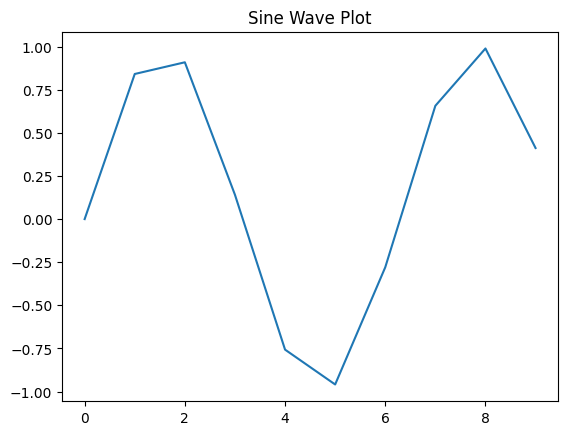

In [ ]:
import io
import matplotlib.pyplot as plt
import numpy as np


y = [np.sin(x) for x in range(10)]
plt.plot(y)
plt.title("Sine Wave Plot")

In [1]:
import plotly.express as px
import pandas as pd
import datetime
times = [
    datetime.datetime(2024, 1, 1),
    datetime.datetime(2024, 1, 2),
    datetime.datetime(2024, 1, 3)
]
sentiments = [0.2, -0.1, 0.5]
df = pd.DataFrame({
    "time": times,
    "sentiment": sentiments
})

fig = px.line(
    df,
    x="time",
    y="sentiment",
    markers=True,
    title="Sentiment Over Time",
    hover_data={
        "time": True,
        "sentiment": ':.2f'
    }
)

fig.write_html("sentiment_chart.html")
